<a href="https://colab.research.google.com/github/Hamid-Mofidi/Synchronization-of-periodic-orbits/blob/main/Hilbert%20transforms/PLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import numpy and scipy libraries
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt



In [ ]:
# Define the frequency range to vary
# Generate a random number of frequencies from a normal distribution
size =100
f_range = np.random.normal(0, 1, size)  # Generate frequencies from 1 to 10 Hz

print(f_range.shape)
# Initialize an array to store the PLV values
plv_values = []

# Loop through each frequency value
for f in f_range:
  # Define two signals with varying frequencies and phases
    fs = 1000
    t = np.arange(0, 1, 1/fs)
    f1 = 10 + 5 * np.cos(2*np.pi*1*t)  # Frequency of signal 1 with variation
    f2 = 10 + 2 * np.cos(2*np.pi*f*t)  # Frequency of signal 2 with variation
    p1 = 0
    p2 = np.pi/4
    x1 = np.sin(2*np.pi*f1*t + p1)
    x2 = np.sin(2*np.pi*f2*t + p2)

    # Apply Hilbert transform to obtain the analytic signals
    z1 = hilbert(x1)
    z2 = hilbert(x2)

    # Calculate the phases of the analytic signals
    phi1 = np.angle(z1)
    phi2 = np.angle(z2)

    # Calculate the phase difference between the signals
    dphi = phi1 - phi2

    # Calculate the phase locking value (PLV) for each time point
    plv = np.abs(np.mean(np.exp(1j*dphi)))

    # Append the PLV value to the array
    plv_values.append(plv)

(100,)


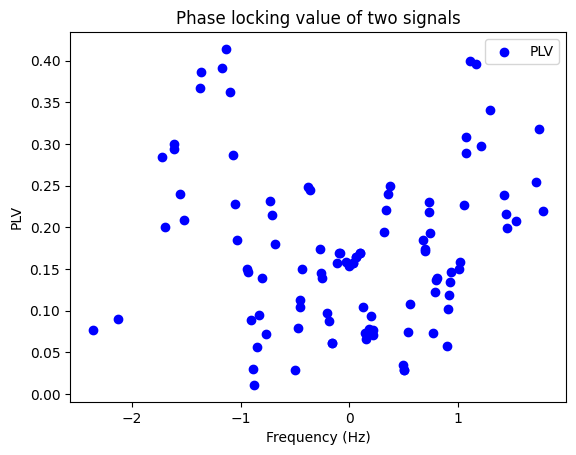

In [ ]:
# Plot the PLV values as a curve
plt.scatter(f_range, plv_values, color='b', label='PLV')

# Add labels and titles
plt.xlabel('Frequency (Hz)')
plt.ylabel('PLV')
plt.title('Phase locking value of two signals')
plt.legend()

# Show the plot
plt.show()